In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/iris.zip')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'],categories=pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


DATA VISUALIZATION

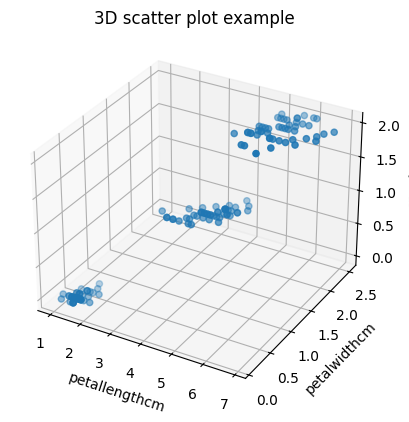

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('petallengthcm')
ax.set_ylabel('petalwidthcm')
ax.set_zlabel('species')
plt.title('3D scatter plot example')
plt.show()

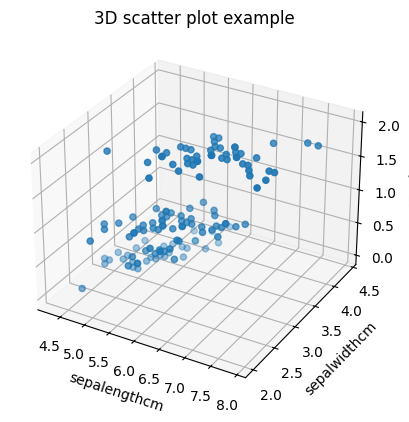

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('sepalengthcm')
ax.set_ylabel('sepalwidthcm')
ax.set_zlabel('species')
plt.title('3D scatter plot example')
plt.show()

3D plot gives glimpse of species of iris flower is more inclined towards variables petal length and petal width

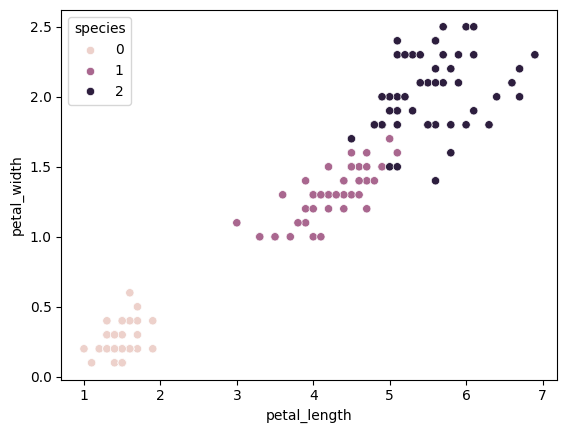

In [ ]:
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species');

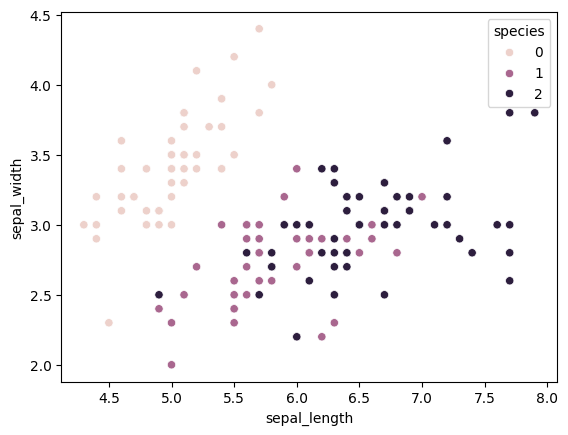

In [ ]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species');

Applying elbow technique

In [ ]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['petal_length','petal_width']])
  sse.append(km.inertia_)

In [ ]:
sse

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 20.255282783882787,
 13.93330875790876,
 11.10362366260479,
 10.699968571585416,
 8.708585994977348,
 6.561663125763127]

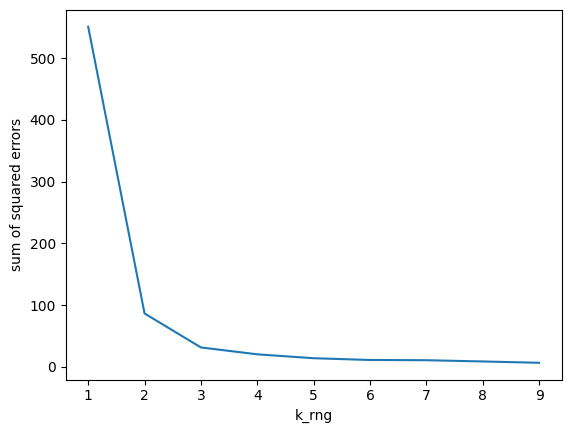

In [ ]:
plt.xlabel('k_rng')
plt.ylabel("sum of squared errors")
plt.plot(k_rng,sse)

Applying kmean algorithm

In [ ]:
km=KMeans(n_clusters=3,random_state=0,)
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


Accuracy measure

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.species,df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]])

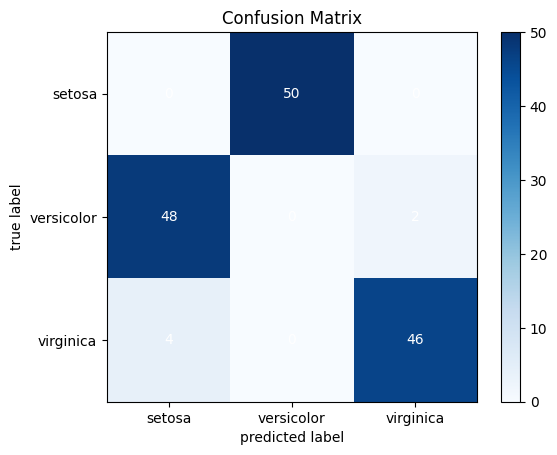

In [ ]:
true_labels=df.species
predicted_labels=df.cluster

cm=confusion_matrix(true_labels,predicted_labels)
class_labels=['setosa','versicolor','virginica']

#plot confusion matrix
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)

#fill matrix with values
for i in range(len(class_labels)):
  for j in range(len(class_labels)):
    plt.text(j,i,str(cm[i][j]),ha='center',va='center',color='white')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()